# e4e setup, run once only!

In [4]:
#@title Setup (may take a few minutes)
import os
os.chdir('/content')
CODE_DIR = 'encoder4editing'

print("Install Dependencies")
#%tensorflow_version 1.x
#! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html 

#!python -m pip install -U pillow

#!git clone https://github.com/omertov/encoder4editing.git $CODE_DIR
#!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
#!sudo unzip ninja-linux.zip -d /usr/local/bin/
#!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force
os.chdir(f'./{CODE_DIR}')

print("Import Modules")
print("Module: ipywidgets")
import ipywidgets as widgets
print("Module: argparse")
from argparse import Namespace
print("Module: time")
import time
print("Module: os")
import os
print("Module: sys")
import sys
print("Module: numpy")
import numpy as np
print("Module: Pillow")
from PIL import Image
print("Module: torch")
import torch
print("Module: torchvision")
import torchvision.transforms as transforms
print("Initial Module Load Complete")

sys.path.append(".")
sys.path.append("..")
print("Importing utils")
from utils.common import tensor2im
print("Importing pixel2style2pixel")
from models.psp import pSp  # we use the pSp framework to load the e4e encoder.
print("Autoreload")
%load_ext autoreload
%autoreload 2

#Set The Experiment Type
print("Set the experiment type(model)")
experiment_type = 'ffhq_encode'
print("Type is: "+ experiment_type)
def get_download_model_command(file_id, file_name):
    """ Get wget download command for downloading the desired model and save to directory pretrained_models. """
    current_directory = os.getcwd()
    save_path = os.path.join(os.path.dirname(current_directory), CODE_DIR, "pretrained_models")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    url = r"""wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={FILE_ID}" -O {SAVE_PATH}/{FILE_NAME} && rm -rf /tmp/cookies.txt""".format(FILE_ID=file_id, FILE_NAME=file_name, SAVE_PATH=save_path)
    return url    

MODEL_PATHS = {
    "ffhq_encode": {"id": "1cUv_reLE6k3604or78EranS7XzuVMWeO", "name": "e4e_ffhq_encode.pt"},
    "cars_encode": {"id": "17faPqBce2m1AQeLCLHUVXaDfxMRU2QcV", "name": "e4e_cars_encode.pt"},
    "horse_encode": {"id": "1TkLLnuX86B_BMo2ocYD0kX9kWh53rUVX", "name": "e4e_horse_encode.pt"},
    "church_encode": {"id": "1-L0ZdnQLwtdy6-A_Ccgq5uNJGTqE7qBa", "name": "e4e_church_encode.pt"}
}

path = MODEL_PATHS[experiment_type]
download_command = get_download_model_command(file_id=path["id"], file_name=path["name"]) 
print("Download the Model (Disabled)")
#!wget {download_command}

#Load the Model Checkpoints
print("Loading Model Checkpoints. . .")
model_path = 'pretrained_models/e4e_ffhq_encode.pt'
torch.cuda.empty_cache()
ckpt = torch.load(model_path, map_location='cpu')
opts = ckpt['opts']
# pprint.pprint(opts)  # Display full options used
# update the training options
opts['checkpoint_path'] = model_path
opts= Namespace(**opts)
net = pSp(opts)
net.eval()
net.cuda()
print('Model successfully loaded!')

print("e4e Setup Complete")

Install Dependencies
Import Modules
Module: ipywidgets
Module: argparse
Module: time
Module: os
Module: sys
Module: numpy
Module: Pillow
Module: torch
Module: torchvision
Initial Module Load Complete
Importing utils
Importing pixel2style2pixel
Autoreload
Set the experiment type(model)
Type is: ffhq_encode
Download the Model (Disabled)
Loading Model Checkpoints. . .
Loading e4e over the pSp framework from checkpoint: pretrained_models/e4e_ffhq_encode.pt


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 3.95 GiB total capacity; 403.81 MiB already allocated; 16.69 MiB free; 412.00 MiB reserved in total by PyTorch)

# StyleCLIP setup, run once only!

In [1]:
%cd
%cd /content/
print("StyleCLIP Phase")
print("Install StyleCLIP Dependencies")
#! pip install ftfy regex tqdm requests tensorflow==1.15.0
#!pip install git+https://github.com/openai/CLIP.git 
#! git clone https://github.com/bycloudai/StyleCLIP
print("Set the dataset name.")
dataset_name='ffhq'
print("Dataset: "+ dataset_name)
# input dataset name 
print("Download the W data and prepare it")
%cd
%cd /content/StyleCLIP/global/
# input prepare data 
#!python GetCode.py --dataset_name $dataset_name --code_type 'w' 
#!python GetCode.py --dataset_name $dataset_name --code_type 's' 
#!python GetCode.py --dataset_name $dataset_name --code_type 's_mean_std' 
print("Importing Modules")
import os

os.chdir('/content/StyleCLIP/global/')

print("Module: tensorflow")
import tensorflow as tf
print("Module: numpy")
import numpy as np 
print("Module: torch")
import torch
print("Module: clip")
import clip
print("Module: pillow")
from PIL import Image
print("Module: pickle")
import pickle
print("Module: copy")
import copy
print("Module: matplotlib.pyplot")
import matplotlib.pyplot as plt
print("Initial Module Load Complete")

print("Importing MapTS")
from MapTS import GetFs,GetBoundary,GetDt
print("Importing manipulator")
from manipulate import Manipulator
print("Selecting Device")
device = "cuda" if torch.cuda.is_available() else "cpu"
#device="cpu"
print("Device is:" + device)
print("Loading model. . .")
model, preprocess = clip.load("ViT-B/32", device=device) 
print("Setting Up Manipulator")
#with tf.device('/job:localhost/replica:0/task:0/device:CPU:0'):
with tf.device('/job:localhost/replica:0/task:0/device:GPU:0'):
    M=Manipulator(dataset_name='ffhq') 
print("Loading fs3")
torch.cuda.empty_cache() 
fs3=np.load('./npy/ffhq/fs3.npy')
np.set_printoptions(suppress=False)
print("All Models Loaded!"

/root
/content
Install StyleCLIP Dependencies
Set the dataset name.
Dataset: ffhq
Download the W data and prepare it
/root
/content/StyleCLIP/global
Importing Modules
Module: tensorflow
Module: numpy
Module: torch
Module: clip
Module: pillow
Module: pickle
Module: copy
Module: matplotlib.pyplot
Initial Module Load Complete
Importing MapTS
Importing manipulator
Selecting Device
Device is:cuda
Loading model. . .
Setting Up Manipulator


2021-09-13 23:48:29.365694: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2021-09-13 23:48:29.366231: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b336a61560 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-13 23:48:29.366276: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-13 23:48:29.367935: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-13 23:48:29.368465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 23:48:29.369033: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b2c2a89030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-09-1

Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.


2021-09-13 23:48:30.215666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 23:48:30.216432: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Quadro K2200 major: 5 minor: 0 memoryClockRate(GHz): 1.124
pciBusID: 0000:0b:00.0
2021-09-13 23:48:30.216642: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-09-13 23:48:30.216827: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-09-13 23:48:30.217078: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-09-13 23:48:30.217258: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand

Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.


2021-09-13 23:48:30.459286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 23:48:30.459982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Quadro K2200 major: 5 minor: 0 memoryClockRate(GHz): 1.124
pciBusID: 0000:0b:00.0
2021-09-13 23:48:30.460196: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-09-13 23:48:30.460332: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-09-13 23:48:30.460396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-09-13 23:48:30.460567: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/Normalize             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656    (?, 512)             (512, 512)      
G_mapping/Dense4                262656    (?, 512)             (512, 512)      
G_mapping/Dense5                262656 

2021-09-13 23:48:39.540304: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-09-13 23:48:39.756864: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-09-13 23:48:42.053115: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


Loading fs3


# Input Image

In [6]:
#@markdown Upload an image to the encoder4editing folder and set the image_name into the image name
image_name = 'images_in/dude.jpg' #@param {type:"string"}
os.chdir('/content/encoder4editing')
EXPERIMENT_DATA_ARGS = {
    "ffhq_encode": {
        "model_path": "pretrained_models/e4e_ffhq_encode.pt",
        "image_path": image_name
    }
    
}
# Setup required image transformations
EXPERIMENT_ARGS = EXPERIMENT_DATA_ARGS[experiment_type]
if experiment_type == 'cars_encode':
    EXPERIMENT_ARGS['transform'] = transforms.Compose([
            transforms.Resize((192, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
    resize_dims = (256, 192)
else:
    EXPERIMENT_ARGS['transform'] = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
    resize_dims = (256, 256)

# Align The Image and Scan for Landmarks

Aligned image has shape: (256, 256)


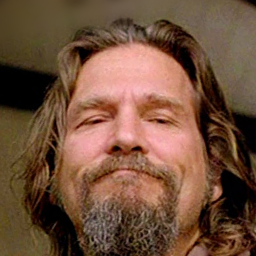

In [8]:
#@title
image_path = EXPERIMENT_DATA_ARGS[experiment_type]["image_path"]
original_image = Image.open(image_path)
original_image = original_image.convert("RGB")
if experiment_type == "ffhq_encode" and 'shape_predictor_68_face_landmarks.dat' not in os.listdir():
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

def run_alignment(image_path):
  import dlib
  from utils.alignment import align_face
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  aligned_image = align_face(filepath=image_path, predictor=predictor) 
  print("Aligned image has shape: {}".format(aligned_image.size))
  return aligned_image 

if experiment_type == "ffhq_encode":
  input_image = run_alignment(image_path)
else:
  input_image = original_image

input_image.resize(resize_dims)

In [10]:
#@title
img_transforms = EXPERIMENT_ARGS['transform']
transformed_image = img_transforms(input_image)

In [11]:
#from e4e+StyleCLIP
def display_alongside_source_image(result_image, source_image):
    res = np.concatenate([np.array(source_image.resize(resize_dims)),
                          np.array(result_image.resize(resize_dims))], axis=1)
    return Image.fromarray(res)

def run_on_batch(inputs, net):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    #device = "cuda:0"
    #device = "cpu"
    images, latents = net(inputs.to(device).float(), randomize_noise=False, return_latents=True)
    if experiment_type == 'cars_encode':
        images = images[:, :, 32:224, :]
    return images, latents
with torch.no_grad():
    tic = time.time()
    images, latents = run_on_batch(transformed_image.unsqueeze(0), net)
    result_image, latent = images[0], latents[0]
    toc = time.time()
    print('Inference took {:.4f} seconds.'.format(toc - tic))
    
torch.save(latents, 'latents.pt')

latents=torch.load('/content/encoder4editing/latents.pt') # located in the top-level folder in the Colab UI
w_plus=latents.cpu().detach().numpy()
dlatents_loaded=M.W2S(w_plus)

img_index = 0
img_indexs=[img_index]

dlatent_tmp=[tmp[img_indexs] for tmp in dlatents_loaded]
M.num_images=len(img_indexs)

M.alpha=[0]
M.manipulate_layers=[0]
codes,out=M.EditOneC(0, dlatent_tmp) 
original=Image.fromarray(out[0,0]).resize((512,512))
M.manipulate_layers=None
original

# Display inversion:
display_alongside_source_image(original, input_image)

RuntimeError: CUDA out of memory. Tried to allocate 16.00 MiB (GPU 0; 3.95 GiB total capacity; 404.56 MiB already allocated; 14.69 MiB free; 414.00 MiB reserved in total by PyTorch)

In [ ]:
torch.save(latents, 'latents.pt')

# StyleCLIP Body

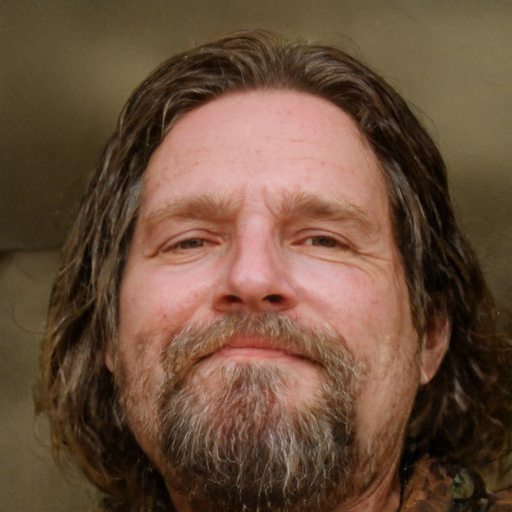

In [2]:
latents=torch.load('/content/encoder4editing/latents.pt') # located in the top-level folder in the Colab UI
w_plus=latents.cpu().detach().numpy()
dlatents_loaded=M.W2S(w_plus)

img_index = 0
img_indexs=[img_index]

dlatent_tmp=[tmp[img_indexs] for tmp in dlatents_loaded]
M.num_images=len(img_indexs)

M.alpha=[0]
M.manipulate_layers=[0]
codes,out=M.EditOneC(0, dlatent_tmp) 
original=Image.fromarray(out[0,0]).resize((512,512))
M.manipulate_layers=None
original

# input text description 
"Neural" should describe the original image
For example

| Edit  | Neutral Text | Target Text |
| --- | --- | --- |
| Smile  | face  | smiling face |
| Gender  | female face  | male face |
| Blonde hair | face with hair | face with blonde hair |
| Hi-top fade | face with hair | face with Hi-top fade hair |
| Blue eyes | face with eyes | face with blue eyes |

In [21]:
neutral='face' #@param {type:"string"}
target='cute eyes' #@param {type:"string"}
classnames=[target,neutral]
dt=GetDt(classnames,model)

0.4265


# modify manipulation strength (alhpa) and disentangle threshold (beta)

- *Manipulation strength* - positive values correspond to moving along the target direction.
- *Disentanglement threshold* - large value means more disentangled edit, just a few channels will be manipulated so only the target attribute will change (for example, grey hair). Small value means less disentangled edit, a large number of channels will be manipulated, related attributes will also change (such as wrinkle, skin color, glasses).

- In the terminal, for every manipulation, the number of channels being manipulated is printed (the number is controlled by the attribute (neutral, target) and the disentanglement threshold).

- For color transformation, usually 10-20 channels is enough. For large structure change (for example, Hi-top fade), usually 100-200 channels are required.
- For an attribute (neutral, target), if you give a low disentanglement threshold, there are just few channels (<20) being manipulated, and usually it is not enough for performing the desired edit.

num of channels being manipulated: 113


(-0.5, 1023.5, 1023.5, -0.5)

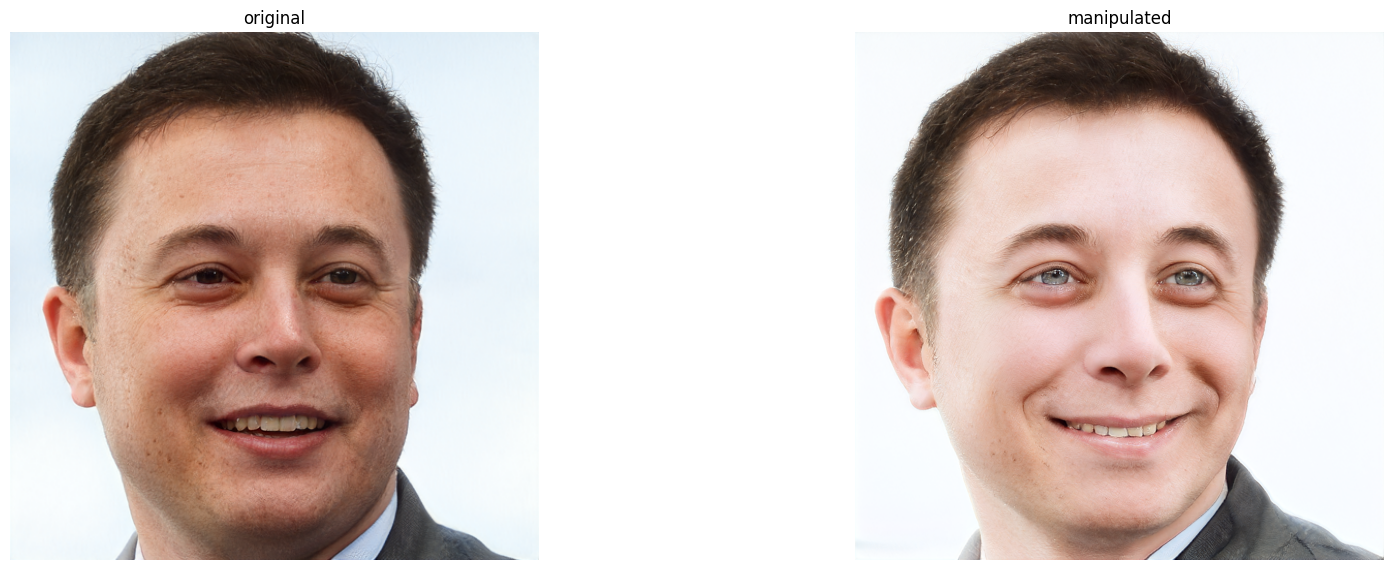

In [25]:

#beta=0.1
#alpha=1
beta = 0.08 #@param {type:"slider", min:0.08, max:0.3, step:0.01}
alpha = 6.2 #@param {type:"slider", min:-10, max:10, step:0.1}
M.alpha=[alpha]
boundary_tmp2,c=GetBoundary(fs3,dt,M,threshold=beta)
codes=M.MSCode(dlatent_tmp,boundary_tmp2)
out=M.GenerateImg(codes)
generated=Image.fromarray(out[0,0])#.resize((512,512))


plt.figure(figsize=(20,7), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(original)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(generated)
plt.title('manipulated')
plt.axis('off')